In [56]:
import pandas as pd

X_train = pd.read_csv('data_X_train.csv', index_col=0)
y_train = pd.read_csv('data_y_train.csv', index_col=0)
X_test = pd.read_csv('data_X_test.csv', index_col=0)
y_test = pd.read_csv('data_y_test.csv', index_col=0)

In [57]:
X_train

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,initial_list_status,tot_coll_amt,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
33404,-0.136818,-0.030533,0.015093,0.125348,0.220614,-0.155546,-0.061525,-0.217364,0.015356,0.064881,-0.030066,0.003184,-0.148095,0.058381,0.011483,0.427169,0.075499,-0.188963,0.097534
29502,-0.212014,0.521076,-0.043641,0.125348,0.077962,-0.155546,0.360769,-0.075556,0.015356,0.064881,-0.007048,0.003184,-0.018148,0.058381,0.011483,0.427169,0.076814,-0.076862,-0.243310
234854,-0.374464,0.427829,0.015093,-0.122606,0.353966,-0.155546,-0.061525,-0.394093,0.015356,0.064881,-0.157113,0.003184,-0.193267,0.058381,0.011483,-0.153798,0.035840,0.083763,-0.243310
182897,0.040477,0.206025,-0.007633,0.125348,0.286613,0.299893,-0.061525,0.469513,0.015356,0.064881,-0.026992,0.003184,0.046576,0.058381,0.011483,-0.321305,0.069947,0.119776,-0.243310
109730,-0.136818,-1.116004,-0.010881,-0.122606,-0.112486,-0.155546,0.154418,0.431956,0.015356,-0.251934,0.088171,0.003184,-0.133017,-0.159806,0.011483,0.056854,-0.074061,-0.053712,-0.207121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.374464,0.619510,-0.007633,0.125348,0.410126,-0.119608,-0.061525,0.294412,0.015356,-0.348822,-0.062223,0.003184,0.579545,0.058381,0.011483,0.361390,0.132454,0.144687,-0.172215
103694,-0.157682,-0.030533,-0.053759,0.125348,-0.097152,-0.155546,-0.061525,0.108801,0.015356,-0.251934,-0.007048,0.003184,0.166895,-0.159806,0.011483,0.056854,0.032071,0.036692,-0.243310
131932,-0.157682,-0.498553,-0.043641,0.125348,0.068151,-0.155546,-0.061525,0.294412,0.015356,-0.133865,-0.157113,0.003184,0.643193,0.058381,0.011483,0.381150,0.113915,0.064199,1.343005
146867,0.170907,0.872106,-0.043641,-0.122606,0.068151,0.299893,-0.061525,0.007543,0.015356,0.064881,0.055198,0.003184,-0.192964,0.058381,0.011483,0.280480,0.126263,-0.116933,0.033792


In [58]:
y_train

,loan_status
33404,0
29502,1
234854,1
182897,1
109730,0
...,...
119879,1
103694,1
131932,1
146867,1


1. check data for class imbalance of target variable;

In [59]:
!pip install yellowbrick

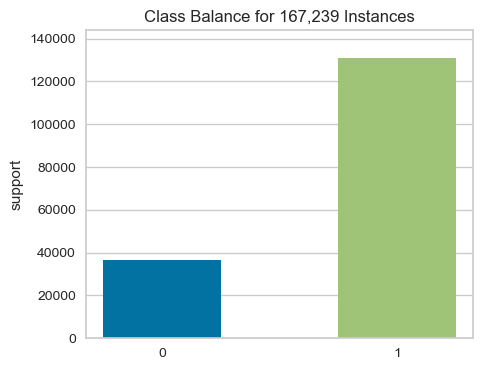

<Axes: title={'center': 'Class Balance for 167,239 Instances'}, ylabel='support'>

In [60]:
import matplotlib.pyplot as plt
from yellowbrick.target import ClassBalance

plt.figure(figsize=(5, 4))
visualizer = ClassBalance()
visualizer.fit(y_train.values.ravel())
visualizer.show()

In [61]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X_train, y_train = os.fit_resample(X_train, y_train)
y_train = y_train.values.ravel()
y_train_series = pd.Series(y_train)

y_train_series.value_counts()

0    130806
1    130806
Name: count, dtype: int64

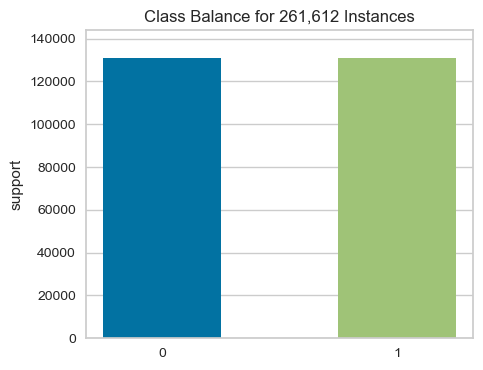

<Axes: title={'center': 'Class Balance for 261,612 Instances'}, ylabel='support'>

In [62]:
plt.figure(figsize=(5, 4))
visualizer = ClassBalance()
visualizer.fit(y_train)
visualizer.show()

2. modeling and results evaluation;

In [63]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=42)

In [65]:
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [66]:
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

val_auc = roc_auc_score(y_val, y_val_proba)
print(f"Validation AUC: {val_auc:.4f}")

Validation AUC: 0.7438


In [67]:
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

test_auc = roc_auc_score(y_test, y_test_proba)
print(f"Test AUC: {test_auc:.4f}")

Test AUC: 0.7382


In [68]:
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')

print("\nStratified 5-Fold CV AUC scores:")
for i, score in enumerate(cv_auc_scores, 1):
    print(f"fold {i}: {score:.4f}")
print(f"mean: {np.mean(cv_auc_scores):.4f}, std: {np.std(cv_auc_scores):.4f}")


Stratified 5-Fold CV AUC scores:
fold 1: 0.7420
fold 2: 0.7385
fold 3: 0.7438
fold 4: 0.7409
fold 5: 0.7432
mean: 0.7417, std: 0.0019


In [69]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.36      0.71      0.47     15753
           1       0.89      0.64      0.74     55921

    accuracy                           0.65     71674
   macro avg       0.62      0.67      0.61     71674
weighted avg       0.77      0.65      0.68     71674



In [70]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_test_pred)], axis=1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
57116,1,0.334014,0
224930,1,0.787814,1
107427,1,0.638606,1
116153,1,0.460652,0
173932,1,0.465920,0


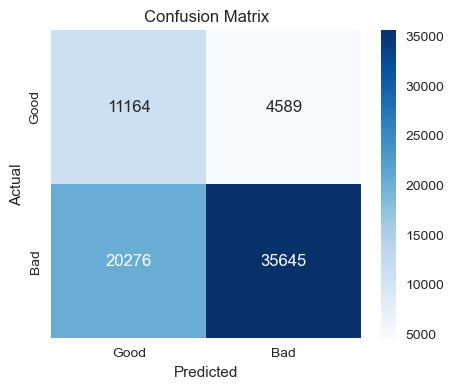

In [71]:
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good", "Bad"], yticklabels=["Good", "Bad"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

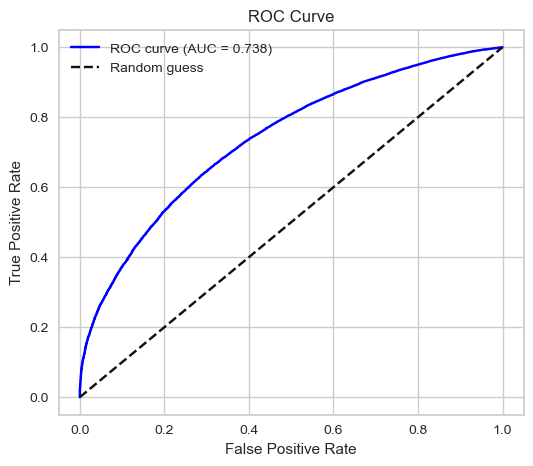

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {test_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='Random guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [73]:
gini = 2 * test_auc - 1
print(f"Gini Coefficient: {gini:.4f}")

Gini Coefficient: 0.4764


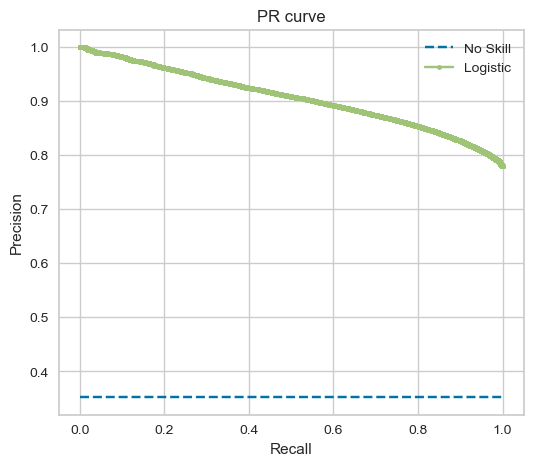

In [74]:
from sklearn.metrics import precision_recall_curve, auc

no_skill = len(y_test[y_test == 1]) / len(y_train)
precision, recall, thresholds = precision_recall_curve(y_test, y_hat_test_proba)

plt.figure(figsize=(6,5))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [75]:
auc_pr = auc(recall, precision)
print(f"Precision-Recall Score: {auc_pr:.4f}")

Precision-Recall Score: 0.9063


In [76]:
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())

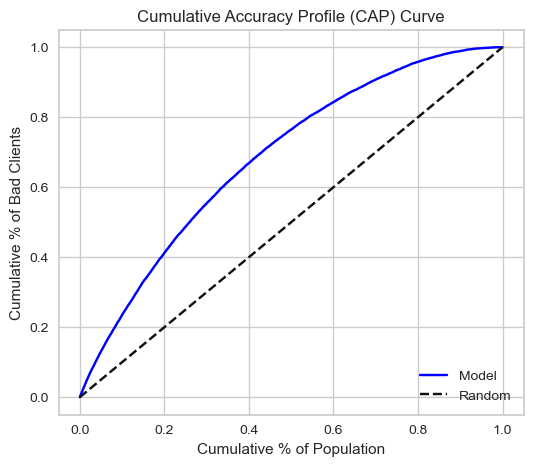

In [77]:
plt.figure(figsize=(6,5))
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'], color='blue', label="Model")
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', color='k', label="Random")
plt.xlabel("Cumulative % of Population")
plt.ylabel("Cumulative % of Bad Clients")
plt.title("Cumulative Accuracy Profile (CAP) Curve")
plt.legend(loc="lower right")

plt.show()

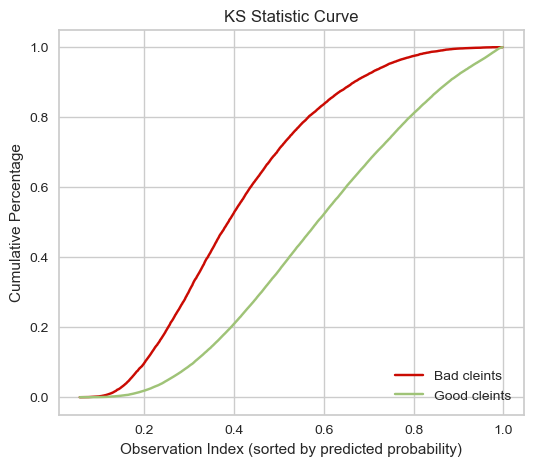

In [78]:
plt.figure(figsize=(6, 5))
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r', label='Bad cleints')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g', label='Good cleints')
plt.xlabel("Observation Index (sorted by predicted probability)")
plt.ylabel("Cumulative Percentage")
plt.title("KS Statistic Curve")
plt.legend(loc='lower right')
plt.show()

In [79]:
ks_stat = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print(f"KS Statistic: {ks_stat:.4f}")

KS Statistic: 0.3466


3. build a scorecard;

In [80]:
import pickle as pkl

with open('features.pkl', 'rb') as f:
    features_name = pkl.load(f)

features_name.append('intercept')

In [81]:
coff = np.concatenate((model.coef_[0], model.intercept_)).tolist()

In [82]:
min_score, max_score = 300, 850

In [83]:
pd.DataFrame(np.column_stack([features_name, coff]), columns=['features', 'coefficients'])

,features,coefficients
0,loan_amnt,1.076121087651306
1,int_rate,0.7581039775131487
2,emp_length,0.5783684820913793
3,home_ownership,0.4616767078802815
4,annual_inc,1.479664750061593
5,verification_status,0.2646549045426513
6,purpose,0.4883756758222769
7,dti,0.4072454805418982
8,delinq_2yrs,0.7400131605135557
9,inq_last_6mths,0.7257169353865517


In [84]:
import numpy as np

def probs_to_score_300_850(probs,
                           score_low=850,      # бажаний скор для low default prob (кращий клієнт)
                           score_high=300,     # бажаний скор для high default prob (гірший клієнт)
                           q_low=0.005,        # квантиль для "кращих" (наприклад 0.5%)
                           q_high=0.995,       # квантиль для "гірших" (наприклад 99.5%)
                           eps=1e-12,
                           clip_scores=True):
    """
    Перетворює масив ймовірностей дефолту (p) у скор на шкалі ~[300,850].
    - probs: numpy array або список ймовірностей дефолту (значення в (0,1)).
    - score_low: скор, який відповідає нижньому квантилю probs (кращі клієнти).
    - score_high: скор, який відповідає верхньому квантилю probs (гірші клієнти).
    - q_low, q_high: квантилі для визначення "якорів".
    - eps: захист від 0/1 у логітах.
    - clip_scores: якщо True — обрізає в [min(score_high, score_low), max(...)].
    """
    p = np.asarray(probs, dtype=float)
    p = np.clip(p, eps, 1 - eps)

    p_low = np.quantile(p, q_low)
    p_high = np.quantile(p, q_high)

    if p_low == p_high:
        raise ValueError("q_low і q_high дали однакові значення p. Змініть квантилі.")

    logit_low = np.log((1 - p_low) / p_low)
    logit_high = np.log((1 - p_high) / p_high)

    factor = (score_low - score_high) / (logit_low - logit_high)
    offset = score_low - factor * logit_low

    logit = np.log((1 - p) / p)
    score = offset + factor * logit

    if clip_scores:
        lo = min(score_low, score_high)
        hi = max(score_low, score_high)
        score = np.clip(score, lo, hi)

    return score, {"factor": factor, "offset": offset,
                   "p_low": p_low, "p_high": p_high,
                   "logit_low": logit_low, "logit_high": logit_high,
                   "q_low": q_low, "q_high": q_high}


probs = model.predict_proba(X_test)[:,1]
scores, meta = probs_to_score_300_850(probs)
print(meta)

{'factor': np.float64(88.87929460540188), 'offset': np.float64(682.0756482056574), 'p_low': np.float64(0.13131827053680628), 'p_high': np.float64(0.9865974225105136), 'logit_low': np.float64(1.8893528862923326), 'logit_high': np.float64(-4.298815037877627), 'q_low': 0.005, 'q_high': 0.995}


In [85]:
pd.DataFrame(meta.items(), columns=["parameter", "value"])

,parameter,value
0,factor,88.879295
1,offset,682.075648
2,p_low,0.131318
3,p_high,0.986597
4,logit_low,1.889353
5,logit_high,-4.298815
6,q_low,0.005000
7,q_high,0.995000


In [86]:
scores

array([743.40991319, 565.48380497, 631.47500789, ..., 697.65074111,
       564.72734009, 748.62930164])

In [87]:
import joblib

joblib.dump(meta, "scoring_meta.pkl")

meta_loaded = joblib.load("scoring_meta.pkl")
print(meta_loaded)

{'factor': np.float64(88.87929460540188), 'offset': np.float64(682.0756482056574), 'p_low': np.float64(0.13131827053680628), 'p_high': np.float64(0.9865974225105136), 'logit_low': np.float64(1.8893528862923326), 'logit_high': np.float64(-4.298815037877627), 'q_low': 0.005, 'q_high': 0.995}


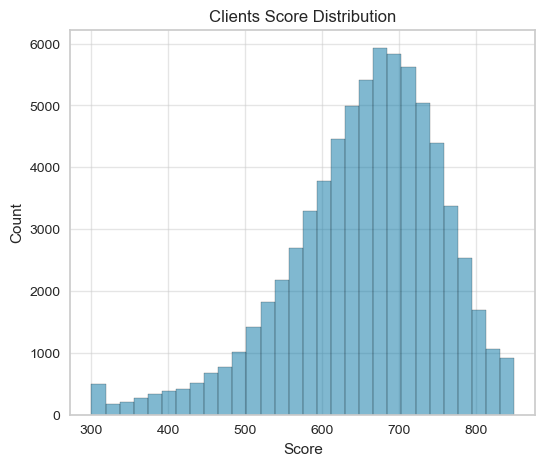

In [117]:
plt.figure(figsize=(6, 5))
plt.hist(scores, bins=30, edgecolor="black", alpha=0.5)
plt.title("Clients Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.grid(alpha=.5)

plt.show()

In [105]:
df_check = pd.DataFrame({"prob": probs, "score": scores})

print(df_check.sort_values("score").head())
print(df_check.sort_values("score").tail())

           prob  score
62625  0.988605  300.0
1522   0.990109  300.0
21523  0.988782  300.0
70878  0.986988  300.0
48416  0.993552  300.0
           prob  score
35173  0.127188  850.0
16004  0.115458  850.0
62487  0.085207  850.0
45261  0.127927  850.0
45378  0.112142  850.0


C:\Users\Michelle\AppData\Local\Temp\ipykernel_8824\2209248865.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_check.groupby(bins).mean()


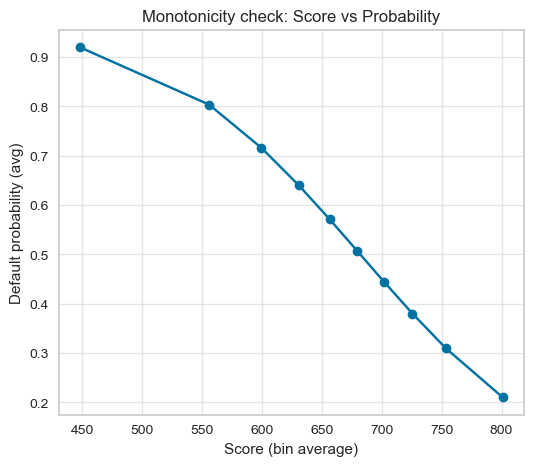

In [116]:
bins = pd.qcut(scores, 10)
grouped = df_check.groupby(bins).mean()

plt.figure(figsize=(6, 5))
plt.plot(grouped["score"], grouped["prob"], marker="o")
plt.xlabel("Score (bin average)")
plt.ylabel("Default probability (avg)")
plt.title("Monotonicity check: Score vs Probability")
plt.grid(alpha=.5)

plt.show()

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def cutoff_analysis(y_true, y_proba, cutoffs=None):
   
    if cutoffs is None:
        cutoffs = np.arange(0.01, 0.95, 0.05)
    
    results = []
    total = len(y_true)
    
    for c in cutoffs:
        y_pred = (y_proba >= c).astype(int)
        
        accepted = (y_pred == 0)
        rejected = (y_pred == 1)
        
        n_accepted = accepted.sum()
        n_rejected = rejected.sum()
        
        bad_rate = y_true[accepted].mean() if n_accepted > 0 else np.nan
        good = (y_true[accepted] == 0).sum()
        bad = (y_true[accepted] == 1).sum()
        
        results.append({
            "cutoff": round(c, 2),
            "accepted_share": n_accepted / total,
            "rejected_share": n_rejected / total,
            "bad_rate": bad_rate,
            "n_accepted": n_accepted,
            "n_good": good,
            "n_bad": bad
        })
    
    df = pd.DataFrame(results)
    
    return df


In [113]:
df = cutoff_analysis(y_test.squeeze(), probs)

df

,cutoff,accepted_share,rejected_share,bad_rate,n_accepted,n_good,n_bad
0,0.01,0.000000,1.000000,NaN,0,0,0
1,0.06,0.000014,0.999986,0.000000,1,1,0
2,0.11,0.001660,0.998340,0.352941,119,77,42
3,0.16,0.013799,0.986201,0.355915,989,637,352
4,0.21,0.043809,0.956191,0.416879,3140,1831,1309
5,0.26,0.090660,0.909340,0.476608,6498,3401,3097
6,0.31,0.149999,0.850001,0.516231,10751,5201,5550
7,0.36,0.220191,0.779809,0.557027,15782,6991,8791
8,0.41,0.295895,0.704105,0.592418,21208,8644,12564
9,0.46,0.374445,0.625555,0.623519,26838,10104,16734


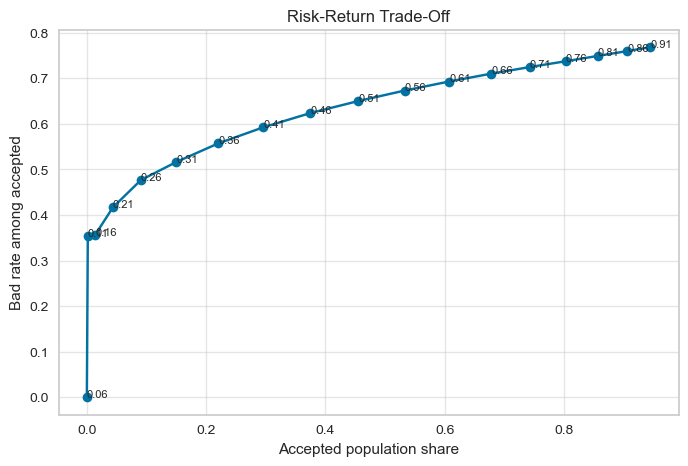

In [115]:
plt.figure(figsize=(8,5))
plt.plot(df["accepted_share"], df["bad_rate"], marker="o")
for i, row in df.iterrows():
    plt.text(row["accepted_share"], row["bad_rate"], f'{row["cutoff"]}', fontsize=8)
plt.xlabel("Accepted population share")
plt.ylabel("Bad rate among accepted")
plt.title("Risk-Return Trade-Off")
plt.grid(alpha=.5)

plt.show()